In [21]:
#!/usr/bin/env python3
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from helper import varDict,getTitleFromDF

try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass


### Get B2TF recast data

In [22]:
b2tf_effs_R = np.genfromtxt('./pp2chi0chi0J_scan_2_nosmear.csv',delimiter=',',names=True)
# b2tf_effs_R = np.genfromtxt('./pp2chi0chi0J_scan_2.csv',delimiter=',',names=True)

b2tf_data_df_R = pd.DataFrame(b2tf_effs_R,columns=b2tf_effs_R.dtype.names)
b2tf_data_df_R['dm'] = b2tf_data_df_R['m1']-b2tf_data_df_R['m0']
b2tf_data_df_R['dm21'] = b2tf_data_df_R['m2']-b2tf_data_df_R['m1']
b2tf_data_df_R['ctau'] = (b2tf_data_df_R['tau']*2.99e8).round(0)
b2tf_data_df_R['ctau_full'] = (b2tf_data_df_R['tau']*2.99e8)

# Upper limit
# observedN = 1647.0
# bgError = 0.05*observedN
# expectedBG = 1647.0
# lumi = 139.0
# deltas_rel = 0.0
# with the above numbers: sigma_vis_UL = 1.2963 fb
b2tf_data_df_R['sigma_UL_fb'] = 1.3/b2tf_data_df_R['eff'] # Upper limit on sigma*BR

In [23]:
print(sorted(b2tf_data_df_R['ms'].unique()))
print(sorted(b2tf_data_df_R['m2'].unique()))
print(sorted(b2tf_data_df_R['dm'].unique()))
print(sorted(b2tf_data_df_R['ctau'].unique()))
print(sorted(b2tf_data_df_R['dm21'].unique()))

[300.0, 500.0, 1000.0, 2000.0]
[134.3, 148.9, 152.8, 170.8, 220.9, 245.8, 252.3, 336.2, 437.4, 487.8, 501.0, 666.9, 870.4, 972.0, 998.5]
[49.95, 50.0, 50.000000000000014, 50.02000000000001, 50.03999999999999, 99.99000000000001, 100.0]
[1.0, 2.0, 4.0, 8.0, 12.0, 16.0, 20.0]
[7.0, 7.000000000000014]


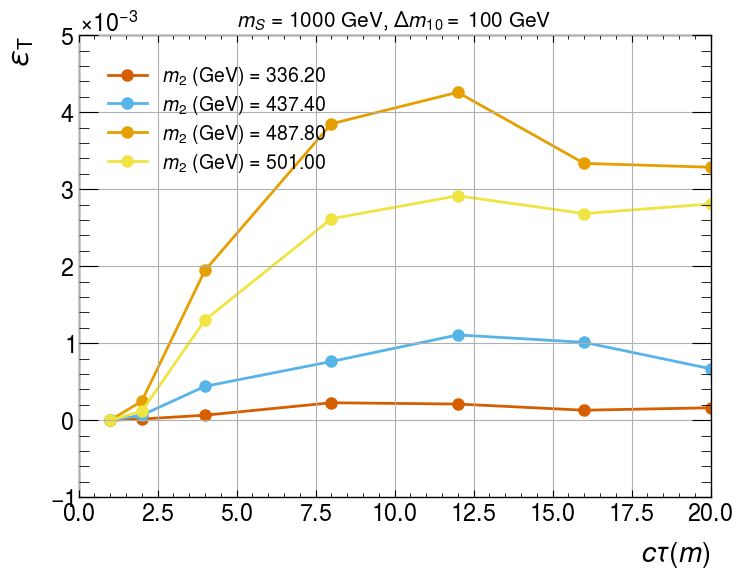

In [24]:
constraints = {'ms' : 1000.0, 'dm' : 100.0}

ylabel = 'm2'
xaxis = 'ctau'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]

b2tf_data_df_filter_R.sort_values([ylabel,xaxis],inplace=True)

for c_value,df in b2tf_data_df_filter_R.groupby(ylabel):    
    plt.plot(df[xaxis],df[yaxis],
                label=f"{varDict[ylabel]} = {c_value:1.2f}",marker='o')
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()

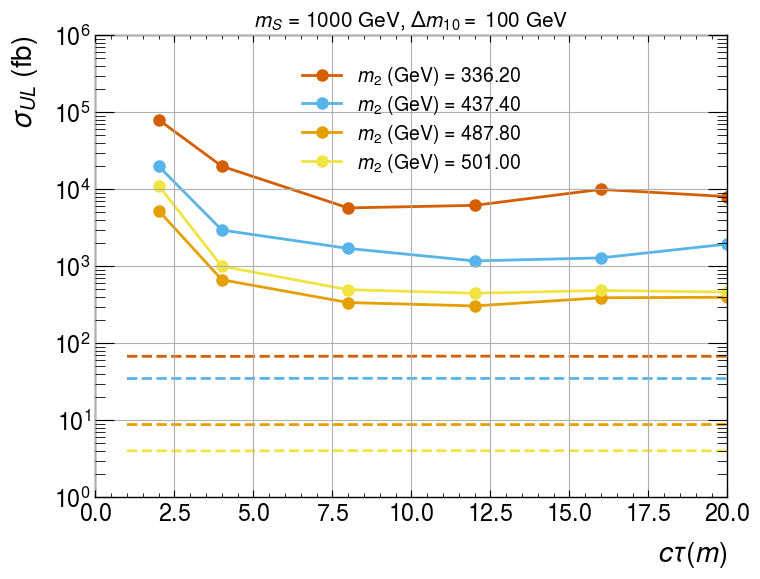

In [25]:
constraints = {'ms' : 1000.0, 'dm' : 100.0}

ylabel = 'm2'
xaxis = 'ctau'
yaxis = 'sigma_UL_fb'
yaxis2 = 'xsec_pb'
# Filter data
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]

b2tf_data_df_filter_R.sort_values([ylabel,xaxis],inplace=True)

for c_value,df in b2tf_data_df_filter_R.groupby(ylabel):    
    p = plt.plot(df[xaxis],df[yaxis],
                label=f"{varDict[ylabel]} = {c_value:1.2f}",marker='o')
    
    plt.plot(df[xaxis],df[yaxis2],c=p[0].get_color(),
                label=None,linestyle='dashed')
    
    
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'$\sigma_{UL}$ (fb)')
plt.yscale('log')
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.savefig('scan_2_upperLimits.png')
plt.show()